In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

In [2]:
df = pd.read_csv("../Data/flight_dep_classi.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45155 entries, 0 to 45154
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MONTH                      45155 non-null  int64  
 1   DAY_OF_MONTH_sin           45155 non-null  float64
 2   DAY_OF_MONTH_cos           45155 non-null  float64
 3   DAY_OF_WEEK_sin            45155 non-null  float64
 4   DAY_OF_WEEK_cos            45155 non-null  float64
 5   CRS_ELAPSED_TIME           45155 non-null  float64
 6   DISTANCE                   45155 non-null  float64
 7   HourlyDewPointTemperature  45155 non-null  float64
 8   HourlyDryBulbTemperature   45155 non-null  float64
 9   HourlyRelativeHumidity     45155 non-null  float64
 10  HourlyVisibility           45155 non-null  float64
 11  HourlyWindSpeed            45155 non-null  float64
 12  CRS_DEP_TIME_sin           45155 non-null  float64
 13  CRS_DEP_TIME_cos           45155 non-null  flo

,MONTH,DAY_OF_MONTH_sin,DAY_OF_MONTH_cos,DAY_OF_WEEK_sin,DAY_OF_WEEK_cos,CRS_ELAPSED_TIME,DISTANCE,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlyVisibility,HourlyWindSpeed,CRS_DEP_TIME_sin,CRS_DEP_TIME_cos,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_DEL15
count,45155.000000,45155.000000,45155.000000,4.515500e+04,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000,45155.000000
mean,5.046728,-0.013925,-0.016607,4.662193e-03,-0.003480,183.310597,1175.492703,42.800066,59.471664,57.692747,9.810818,8.246529,-0.063401,-0.300808,4.342642,3.611007,45.445288,0.117418
std,0.808438,0.715961,0.697820,7.068339e-01,0.707371,84.569100,732.185970,6.723190,9.337098,18.536586,0.983229,3.873726,0.717809,0.624712,3.858876,0.992802,25.759279,0.321921
min,4.000000,-0.998717,-0.994869,-9.749279e-01,-0.900969,49.000000,93.000000,5.000000,30.000000,11.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,-0.724793,-0.758758,-7.818315e-01,-0.900969,125.000000,679.000000,39.000000,53.000000,44.000000,10.000000,6.000000,-0.793353,-0.866025,1.000000,4.000000,22.000000,0.000000
50%,5.000000,-0.101168,-0.050649,-2.449294e-16,-0.222521,166.000000,978.000000,43.000000,58.000000,59.000000,10.000000,8.000000,-0.143493,-0.500000,3.000000,4.000000,45.000000,0.000000
75%,6.000000,0.724793,0.688967,7.818315e-01,0.623490,244.000000,1721.000000,48.000000,65.000000,71.000000,10.000000,10.000000,0.669131,0.086286,9.000000,4.000000,71.000000,0.000000
max,6.000000,0.998717,1.000000,9.749279e-01,1.000000,411.000000,2724.000000,60.000000,102.000000,100.000000,10.000000,30.000000,1.000000,0.999986,11.000000,4.000000,85.000000,1.000000


In [3]:
target = "DEP_DEL15"

features = [
    "MONTH",
    "DAY_OF_MONTH_sin", "DAY_OF_MONTH_cos",
    "DAY_OF_WEEK_sin", "DAY_OF_WEEK_cos",
    "CRS_ELAPSED_TIME", "DISTANCE",
    "HourlyDewPointTemperature", "HourlyDryBulbTemperature",
    "HourlyRelativeHumidity", "HourlyVisibility", "HourlyWindSpeed",
    "CRS_DEP_TIME_sin", "CRS_DEP_TIME_cos",
    "OP_UNIQUE_CARRIER", "ORIGIN", "DEST"
]

X = df[features]
y = df[target]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [6]:
model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',  
    random_state=42
)
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [7]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC : {roc_auc_score(y_test, y_prob):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Results
Accuracy: 0.5820
ROC-AUC : 0.6613

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.57      0.71      7971
         1.0       0.17      0.68      0.28      1060

    accuracy                           0.58      9031
   macro avg       0.55      0.63      0.49      9031
weighted avg       0.84      0.58      0.66      9031



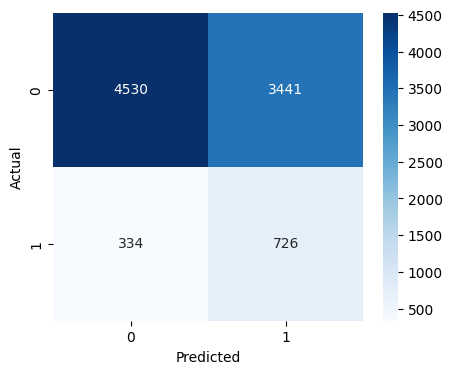

In [10]:
# Confusion Matrix - Logistic Regression
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

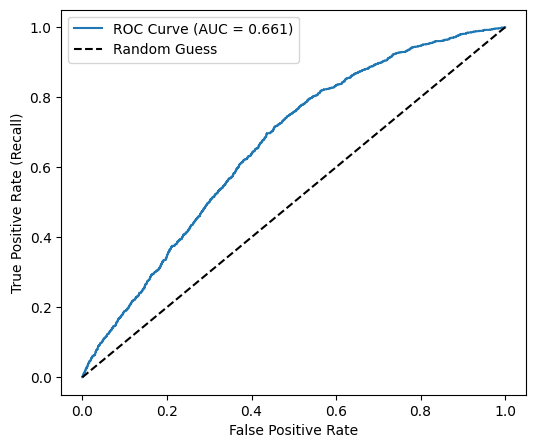

In [11]:
# ROC Curve - Logistic Regression
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.3f})")
plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend()
plt.show()